In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('All the Intermediate Colleges in Pakistan.csv')


In [41]:
# Get the number of rows and columns in the DataFrame
df.shape

(1630, 6)

In [17]:
# Display the first 5 rows of Dataset
df.head(5)

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [19]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [21]:
#Display Summary Statistics of the Data
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [23]:
#Display Basic Statistical Details
(df.describe())

,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


In [25]:
#Check for Missing Values
df.isnull().sum()

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64

In [35]:
#Drop the Rows with Missing Values of Location, Sector and Affiliation
df.dropna(subset=['Location','Sector'], inplace=True)

In [37]:
#Check the Missing Values
df.isnull().sum()

Name                0
Location            0
Study Program       0
Sector              0
Affiliation      1025
Rating              0
dtype: int64

In [39]:
df.shape

(1100, 6)

In [65]:
# Ensure the 'Rating' column is of string type, remove asterisks, convert to float, and store back in 'Rating'
df['Rating'] = df['Rating'].astype(str).str.replace('*','').astype(float)
print(df)

                                                   Name  \
0                                      Campus.pk Lahore   
1           Allama Iqbal Open University Aiou Islamabad   
2              Government College University Gcu Lahore   
3                Govt College University GCU Faisalabad   
4     Lahore College For Women University (Lcwu) Lahore   
...                                                 ...   
1625               Riphah International College Lodhran   
1626                     Govt College of Education Bagh   
1627                  Riphah International College Swat   
1628                  Riphah International College Dina   
1629                Riphah International College Dargai   

                                               Location  \
0     Office 206, 2nd Floor Siddique Trade Center Ma...   
1                           Sector H-8, Islamabad-44000   
2             GC University, Katchery Road Lahore 54000   
3                          Kotwali Rd, Faisalabad 38000

In [45]:
# Extract region names from college names
def extract_region(Name):
    return Name.split()[-1] if len(Name.split()) > 0 else ""


In [47]:
# Apply the function to extract region names
df['region'] = df['Name'].apply(extract_region)

In [53]:
# Display the first few rows to verify the extraction
print(df[['Name', 'region']].head())

                                                Name      region
0                                   Campus.pk Lahore      Lahore
1        Allama Iqbal Open University Aiou Islamabad   Islamabad
2           Government College University Gcu Lahore      Lahore
3             Govt College University GCU Faisalabad  Faisalabad
4  Lahore College For Women University (Lcwu) Lahore      Lahore


In [122]:
print(df['region'].unique())

['Lahore' 'Islamabad' 'Faisalabad' 'Rawalpindi' 'Multan' 'University'
 'Peshawar' 'AIOU' 'Bahawalpur' '(LGU)' 'Pakistan' 'Abbottabad' 'Quetta'
 'Gujranwala' 'Abbottabad.' 'School' 'PAC' 'Pukhtunkhwa' 'College'
 'Sargodha' 'Sialkot' 'Gujrat' 'University-AIOU-Quetta' 'Malaysia)'
 'Karachi' 'Chakwal' 'Cantt' 'Swat' 'Sukkur' 'Kohat' 'Bahaudddin' 'Jhelum'
 'Sheikhupura' 'Khan' '(RAC)' 'CIMS' 'Okara' 'Colleges' 'Arifwala'
 'Khanewal' 'Sahiwal' 'Jhang' 'Kharian' 'Attock' 'Bahaudin' 'Swabi'
 'Hafizabad' 'Wazirabad' 'Bhakkar' 'Bahawalnagar' 'Sciences' 'Chiniot'
 'Pattoki' 'Bannu' 'Women' 'Singh' 'Mardan' 'Science' 'Samundri'
 'Burewala' 'Jauharabad' 'Sadiqabad' 'Khushab' 'Nowshera' 'Hyderabad'
 'Baha-ud-Din' 'Jaranwala' 'Narowal' 'Vehari' 'Raiwind' 'Abbotabad'
 'Kasur' 'Daska' 'Mirpur' 'Chishtian' 'Channu' 'Chaklala' 'Phalia'
 'Shahkot' 'Bhalwal' 'sargodha' 'Depalpur' 'Jattan' 'Rawalkot' 'AJK'
 'Mianwali' 'Pakpattan' 'Nagar' 'Kamoke' 'Girls' 'Layyah' 'Bela' 'Gojra'
 'Addu' 'Shakargarh' 'Sambria

In [124]:
region_counts = df['region'].value_counts()
print(region_counts)

region
Lahore        105
Islamabad      81
Faisalabad     70
Rawalpindi     55
Sargodha       49
             ... 
Shahkot         1
Phalia          1
Chaklala        1
Channu          1
Dargai          1
Name: count, Length: 160, dtype: int64


In [126]:
# Count the number of colleges in each region
region_counts = df['region'].value_counts()

In [128]:
all_regions = ['Punjab', 'Islamabad', 'KPK', 'Balochistan', 'Sindh', 'AJK']
region_counts = region_counts.reindex(all_regions, fill_value=0)

In [132]:
sorted_region_counts_desc = region_counts.sort_values(ascending=False)

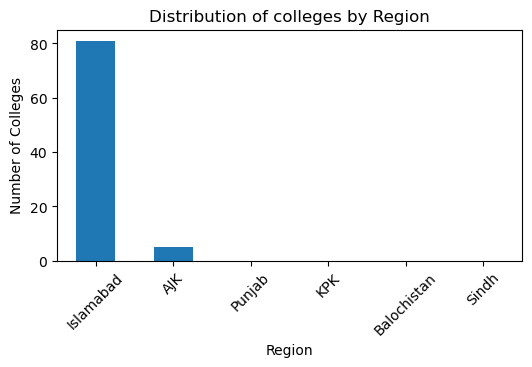

In [134]:
plt.figure(figsize=(6,3))
sorted_region_counts_desc.plot(kind='bar', xlabel='Region', ylabel='Number of Colleges', title='Distribution of colleges by Region')
plt.xticks(rotation=45)
plt.show()

In [49]:
print (df['Sector'].value_counts())

Sector
Private    562
Public     539
Name: count, dtype: int64


In [51]:
sector_counts = df['Sector'].value_counts()

In [71]:
print(df['Sector'].unique())
print(len(df['Sector'].unique()))


['Private' 'Public' nan]
3


In [73]:
sector_counts = df['Sector'].value_counts()
print(sector_counts)


Sector
Private    562
Public     539
Name: count, dtype: int64


In [75]:
threshold = 10  # Set a threshold for aggregation
filtered_sector_counts = sector_counts[sector_counts > threshold]
other_sector_count = sector_counts[sector_counts <= threshold].sum()
filtered_sector_counts['Other'] = other_sector_count


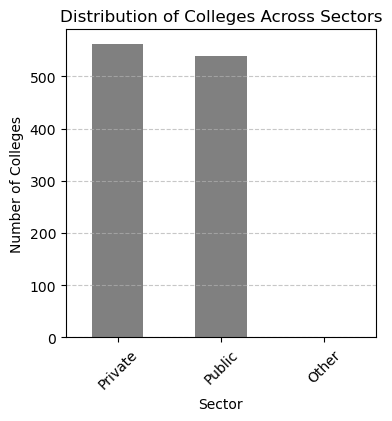

In [95]:
 # Plot a bar chart
plt.figure(figsize=(4, 4))
filtered_sector_counts.plot(kind='bar', color='gray')
plt.title('Distribution of Colleges Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [121]:
regions_to_include = ['Sindh', 'Punjab', 'KPK', 'Balochistan', 'Islamabad', 'AJK']
filtered_df = df[df['region'].isin(regions_to_include)]


In [123]:
region_sector_counts = filtered_df.groupby(['region', 'Sector']).size().unstack(fill_value=0)


<Figure size 400x400 with 0 Axes>

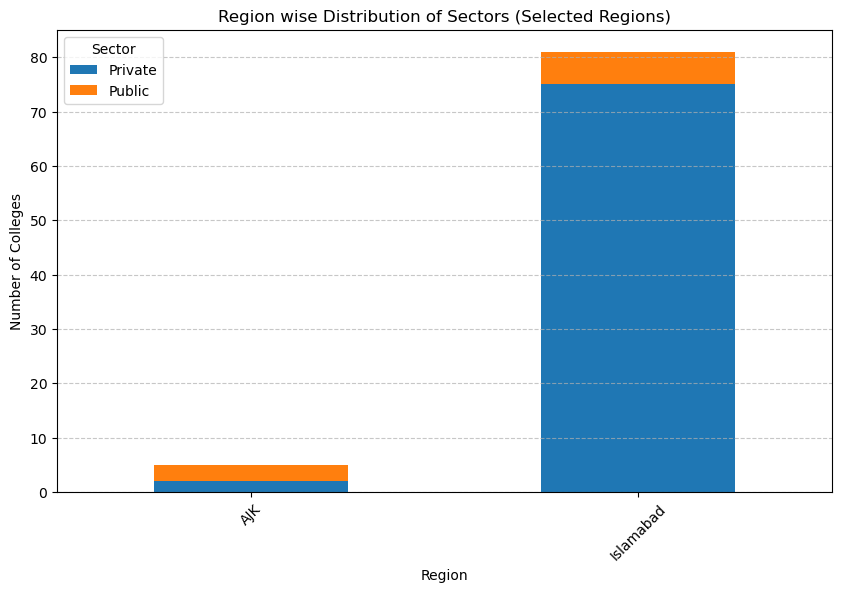

In [127]:
plt.figure(figsize=(4, 4))
region_sector_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Region wise Distribution of Sectors (Selected Regions)')
plt.xlabel('Region')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [141]:
# Ensure 'affiliation' column exists
if 'Affiliation' in df.columns:
# Group by 'affiliation' and count the number of colleges
    affiliation_counts = df['Affiliation'].value_counts()
    print("Number of colleges by affiliation:")
    print(affiliation_counts)
    
# Calculate the sum of all counts
total_colleges = affiliation_counts.sum()
print("\nTotal number of colleges:", total_colleges)

Number of colleges by affiliation:
Affiliation
University of Sargodha                                                                7
University of punjab                                                                  6
BISE Lahore \r\n University of the Punjab Lahore                                      6
University of the Punjab Lahore \r\n BISE Lahore                                      5
University of Peshawar                                                                5
                                                                                     ..
Karachi University                                                                    1
Islamia University Bahawalpur                                                         1
GC University Faisalabad                                                              1
Board of Intermediate and Secondary Education \r\n University of the Punjab Lahore    1
Punjab University                                                        

In [143]:
#Filter out rows where Affiliation is not NoN (assuming NoN indicates no affiliation
affiliated_colleges = df[df['Affiliation'].notna()]

In [147]:
#Count the number of colleges in each sector for affiliated colleges
sector_counts = affiliated_colleges['Sector'].value_counts()

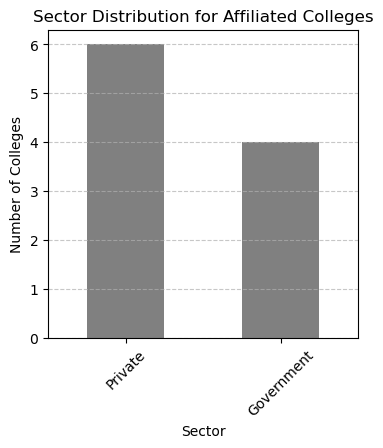

In [65]:
# Plot a bar Chart for affiliated sectors
plt.figure(figsize=(4, 4))
bars = sector_counts.plot(kind='bar', color='gray')
plt.title('Sector Distribution for Affiliated Colleges')
plt.xlabel('Sector')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Add value annotations on the bars
for bar in bars.containers[0]:
    bars.annotate(
        str(bar.get_height()),
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        xytext=(0, 5),  # Offset text by 5 points above the bar
        textcoords="offset points",
        ha='center', va='bottom')


Column names in the DataFrame: Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation', 'Rating'], dtype='object')
Non-numeric ratings:
                                                    Name  \
0                                      Campus.pk Lahore   
1           Allama Iqbal Open University Aiou Islamabad   
2              Government College University Gcu Lahore   
3                Govt College University GCU Faisalabad   
4     Lahore College For Women University (Lcwu) Lahore   
...                                                 ...   
1625               Riphah International College Lodhran   
1626                     Govt College of Education Bagh   
1627                  Riphah International College Swat   
1628                  Riphah International College Dina   
1629                Riphah International College Dargai   

                                               Location  \
0     Office 206, 2nd Floor Siddique Trade Center Ma...   
1                       

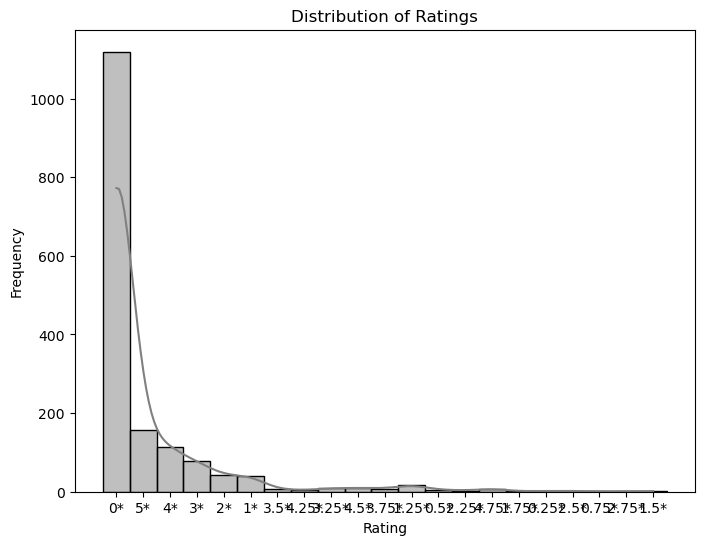

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('All the Intermediate Colleges in Pakistan.csv')

# Print the column names
print("Column names in the DataFrame:", df.columns)

# Check if 'Rating' column exists
if 'Rating' in df.columns:
    # Ensure 'Rating' column is treated as string type
    df['Rating'] = df['Rating'].astype(str)

    # Identify and print non-numeric entries in 'Rating'
    non_numeric_ratings = df[~df['Rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    print("Non-numeric ratings:\n", non_numeric_ratings)

    # Debug: Print unique values and summary statistics
    print("Unique values in 'Rating':", df['Rating'].unique())
    print("Summary statistics for 'Rating':\n", df['Rating'].describe())

    # Plot the distribution of ratings
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Rating'], bins=10, kde=True, color='gray')
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'Rating' column not found in the DataFrame. Please check the DataFrame or correct the column name.")


["['FSc'," "'Pre'," "'Engineering'," "'Fsc'," "'Medical']" "'ICs',"
 "'Computer'," "'Science'," "'FSc'," "'Medical'," "'Higher',"
 "'Secondary'," "'School'," "'Certificate'," "'('," "'FA'," "'-',"
 "'Dars-E-Nazami'," "'Group)'," "'General'," "'Icom'," "'FA']" "'ICS',"
 "'F.A'," "'(Arts)'," "'(General'," "'Science)'," "'I.Com']"
 "'Pre-Engineering'," "'Pre-Medical'," "'Science']" "['FA'," "'Arts',"
 "'Physics'," "'Statistics'," "'Economics'," "'(Home'," "'Economics)',"
 "'F.Sc'," "'(Applied'," "'Psychology)'," "'Icom']" "'Agriculture']"
 "'Humanities'," "'Sciecne'," "['Fsc'," "'Intermediate'," "'in',"
 "'Home'," "['Higher'," "'(Dars-E-Nazami'," "'Commerce'," "'ICom',"
 "'Group)']" "['FSC'," "'pre'," "'FSC'," "'medical'," "'ICOM'," "['ICS',"
 "'A'," "'level'," "'Arts']" "'ICS']" "['Intermediate'," "'Culinary',"
 "'(PBTE)'," "'Hotel'," "'Operations'," "'(PBTE)']" "'Laboratory',"
 "'Technology'," "'Dental'," "'Hygiene'," "'Ophthalmology'," "'Imaging',"
 "'Physiotherapy'," "'OT'," "'Technol

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4476\3497342292.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_study_programs.values, y=top_study_programs.index, palette='viridis')


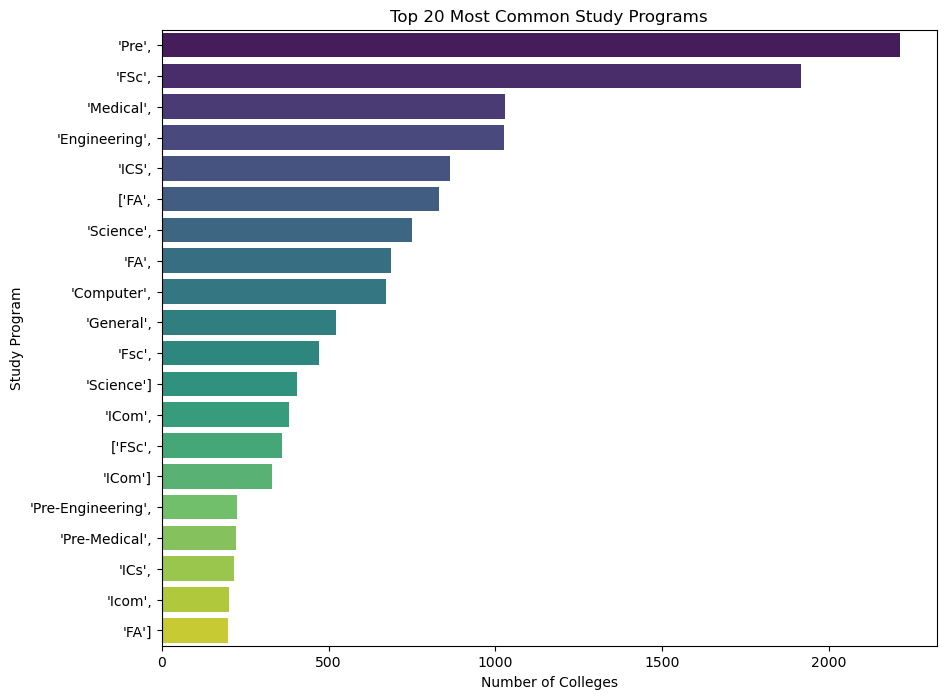

In [45]:
# Ensure the 'Study Program' column is treated as string type
df.loc[:, 'Study Program'] = df['Study Program'].astype(str)

# Split the 'Study Program' column into individual components
df.loc[:, 'Study Program'] = df['Study Program'].str.split()

# Explode the DataFrame based on the 'Study Program' column
df_exploded = df.explode('Study Program')

# Debugging: Check the unique values in 'Study Program'
print(df_exploded['Study Program'].unique())

# Count the occurrences of each split study program and select top 20
top_study_programs = df_exploded['Study Program'].value_counts().head(20)

# Debugging: Check the top 20 study programs
print(top_study_programs)

# Plotting the top 20 split Study Programs using seaborn (horizontal bar plot)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_study_programs.values, y=top_study_programs.index, palette='viridis')
plt.title('Top 20 Most Common Study Programs')
plt.xlabel('Number of Colleges')
plt.ylabel('Study Program')
plt.show()


Column names in the DataFrame: Index(['Study Program', 'Rating'], dtype='object')
Non-numeric ratings:
   Study Program Rating
4          Math     0*
Unique values in 'Rating': [4.5 3.  5.  2.  4. ]
Summary statistics for 'Rating':
 count    5.000000
mean     3.700000
std      1.204159
min      2.000000
25%      3.000000
50%      4.000000
75%      4.500000
max      5.000000
Name: Rating, dtype: float64


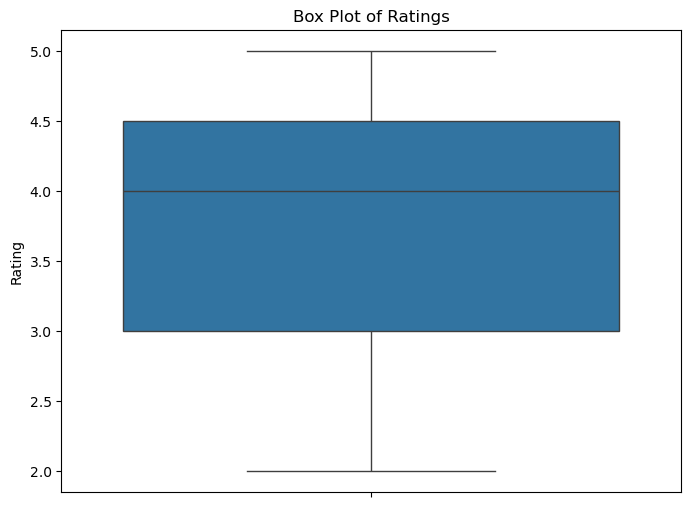

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration purposes (you should replace this with your actual data)
data = {
    'Study Program': ['Math', 'Science', 'History', 'Art', 'Math', 'Science'],
    'Rating': ['4.5', '3.0', '5.0', '2.0', '0*', '4.0']
}
df = pd.DataFrame(data)

# Print the column names
print("Column names in the DataFrame:", df.columns)

# Check if 'Rating' column exists
if 'Rating' in df.columns:
    # Ensure 'Rating' column is treated as string type
    df['Rating'] = df['Rating'].astype(str)

    # Identify and print non-numeric entries in 'Rating'
    non_numeric_ratings = df[~df['Rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    print("Non-numeric ratings:\n", non_numeric_ratings)

    # Convert 'Rating' to numeric, coercing errors to NaN
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

    # Drop rows with NaN values in 'Rating'
    df = df.dropna(subset=['Rating'])

    # Debug: Print unique values and summary statistics
    print("Unique values in 'Rating':", df['Rating'].unique())
    print("Summary statistics for 'Rating':\n", df['Rating'].describe())

    # Plot the box plot of ratings
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df['Rating'])
    plt.title('Box Plot of Ratings')
    plt.ylabel('Rating')
    plt.show()
else:
    print("'Rating' column not found in the DataFrame. Please check the DataFrame or correct the column name.")
